In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten
import pandas as pd

In [64]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [67]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset',target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset',target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 138 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


In [68]:
x_train.class_indices

{'Bird': 0, 'Flower': 1, 'Mammal': 2}

In [69]:
birds=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird')

Found 42 images belonging to 2 classes.


In [70]:
birds.class_indices

{'Great_Indian_Bustard_Bird': 0, 'Spoon Billed Sandpiper Bird': 1}

In [71]:
flowers=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Flower')

Found 49 images belonging to 2 classes.


In [72]:
flowers.class_indices

{'Corpse Flower': 0, 'Lady Slipper Orchid Flower': 1}

In [73]:
mammals=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Mammal')

Found 47 images belonging to 2 classes.


In [74]:
mammals.class_indices

{'Pangolin Mammal': 0, 'Senenca White Deer Mammal': 1}

In [75]:
model=Sequential()

In [76]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3)))

In [77]:
model.add(MaxPooling2D((2,2)))

In [78]:
model.add(Flatten())

In [79]:
model.add(Dense(units = 128, kernel_initializer= "random_uniform",activation = "relu"))

In [80]:
model.add(Dense(units = 3, kernel_initializer= "random_uniform",activation = "softmax"))


In [81]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy" , metrics =["accuracy"])


In [106]:
model.fit_generator(x_train,steps_per_epoch =251 ,epochs = 5, validation_data = x_test,validation_steps =28 )


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


  5/251 [..............................] - ETA: 44s - loss: 1.1428 - accuracy: 0.5072

251/251 [==============================] - 2s 6ms/step - loss: 1.1428 - accuracy: 0.5072 - val_loss: 0.8047 - val_accuracy: 0.5217


In [107]:
model.save("final_model.h5")

In [108]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("./final_model.h5")

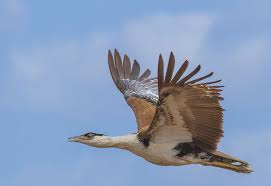

In [109]:
from IPython.display import Image
img=Image(filename=r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird/Great_Indian_Bustard_Bird/download(9).jpg')
img

In [110]:
from tensorflow.keras.preprocessing  import image
path2=r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird/Great_Indian_Bustard_Bird/download(9).jpg'

img = image.load_img(path2,target_size = (64,64))

In [112]:
type(img)
#PIL.Image.Image

PIL.Image.Image

In [113]:
x = image.img_to_array(img)

In [114]:
x.shape

(64, 64, 3)

In [115]:
type(x)

numpy.ndarray

In [116]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [117]:
pred = np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 63ms/step


0

In [118]:
index=["birds","flowers","mammals"]

In [119]:
natur1=index[pred]

In [120]:
natur1

'birds'

In [121]:
if natur1=="birds":
 a=["Great Indian Bustard Bird","Spoon Billed Sandpiper Bird"]
elif natur1=="flowers":
 a=[" Corpse Flower", "Lady Slipper Orchid Flower"]
else:
 a=["Pangolin Mammal","Senenca White Deer Mammal"]

In [122]:
a
#['gatto', 'mucca', 'pecora']

['Great Indian Bustard Bird', 'Spoon Billed Sandpiper Bird']

In [123]:
natur1=a[pred]

In [124]:
natur1
#'gatto'

'Great Indian Bustard Bird'

In [126]:
model.save_weights("naturalist")